In [32]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [33]:
analysis = scripts.Analysis()

In [34]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_5',
                          'wgt_1_.85_.7_.6_.45',
                          'subarctic_winter')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [35]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_5',
                               'wgt_1_.85_.7_.6_.45',
                               'subarctic_winter')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [36]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [37]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [38]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [39]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [40]:
fig.display_hrefanchor()

In [41]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [42]:
table_dgdgs.display_hrefanchor()

In [43]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

In [44]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

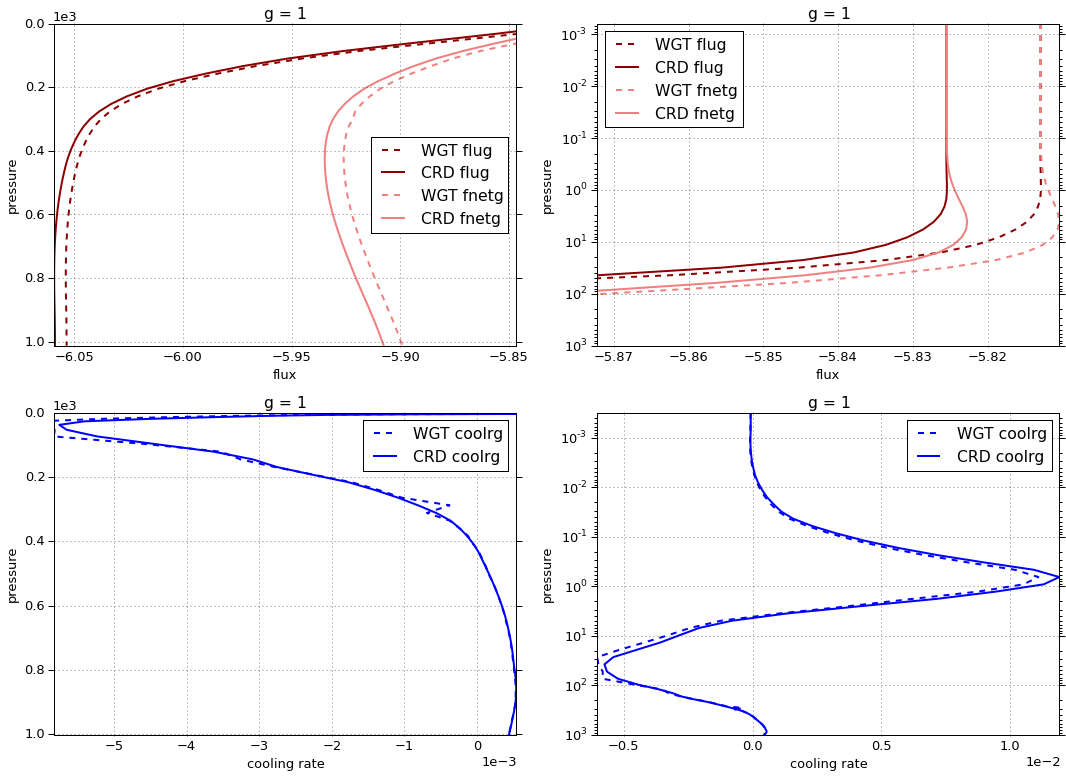

# Figure: flux, cooling rate. g-group 2

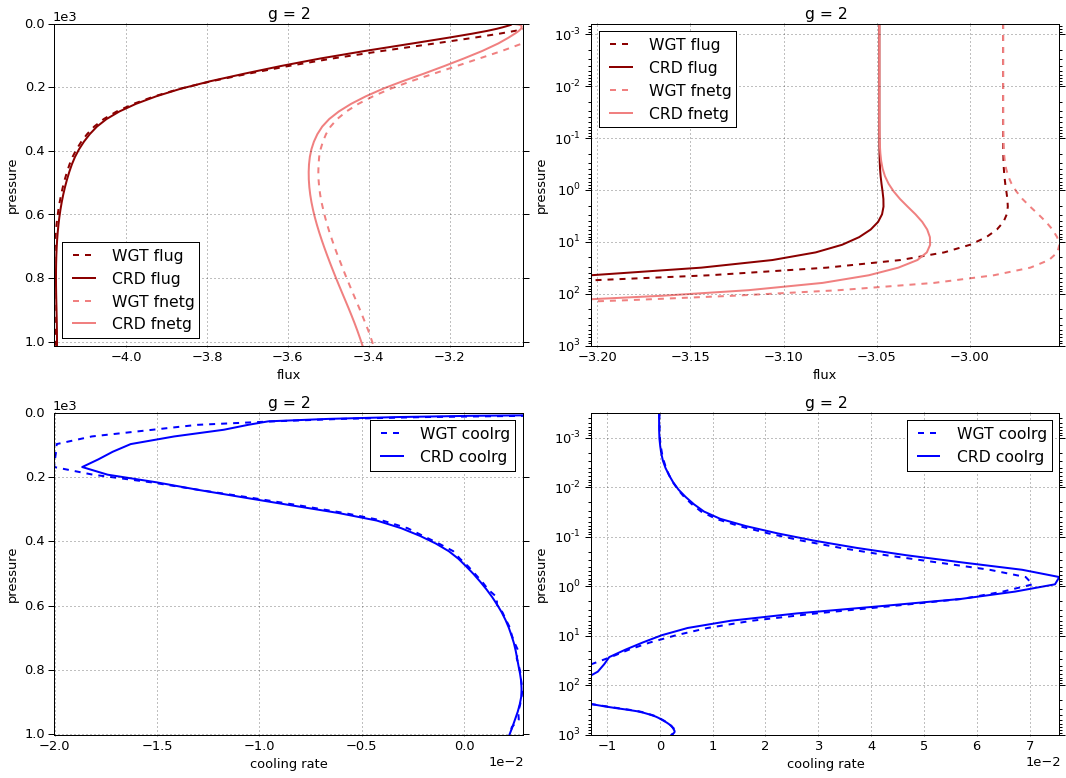

# Figure: flux, cooling rate. g-group 3

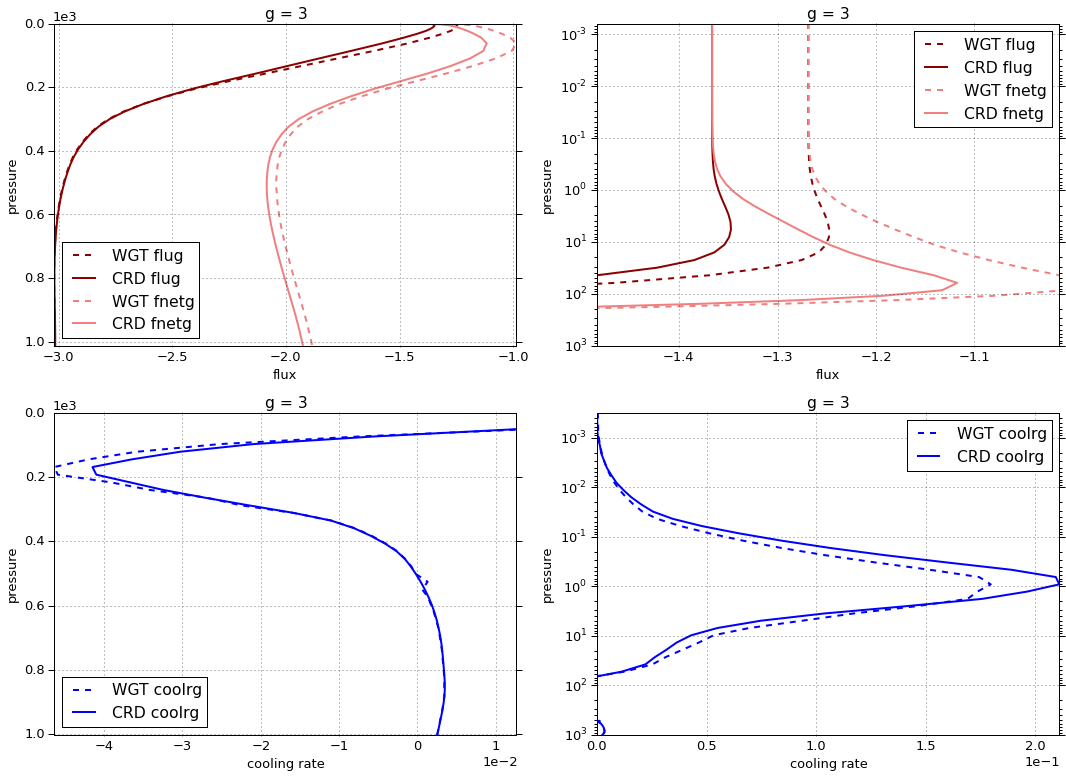

# Figure: flux, cooling rate. g-group 4

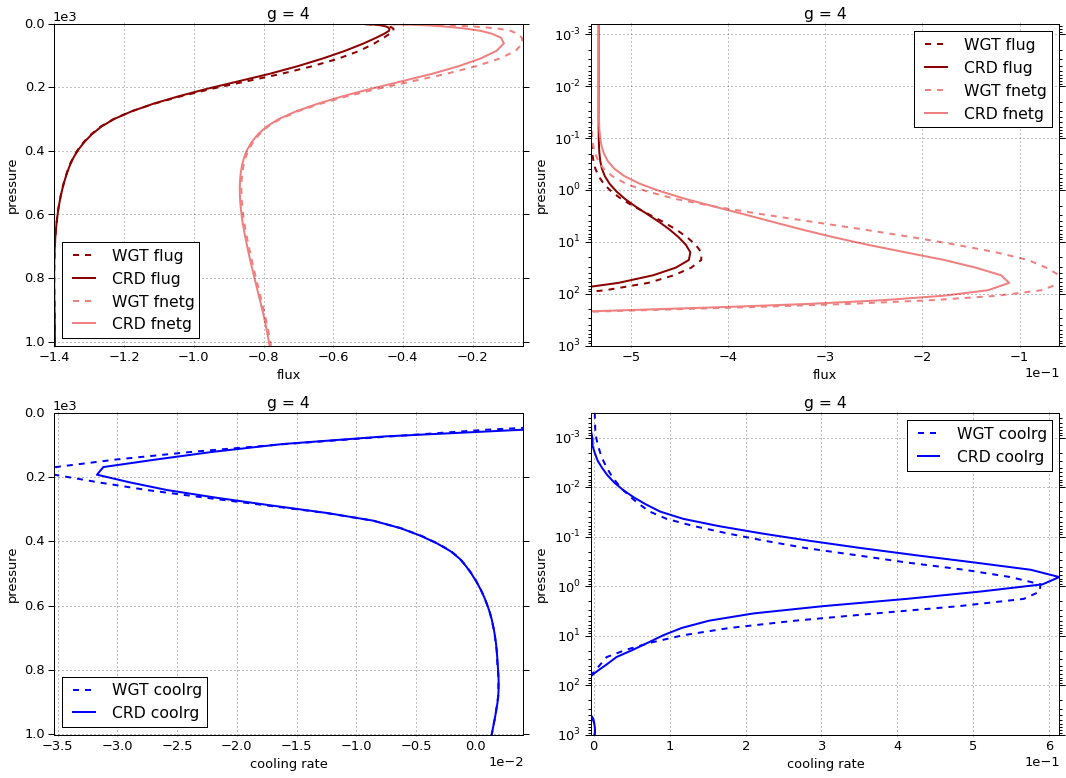

# Figure: flux, cooling rate. g-group 5

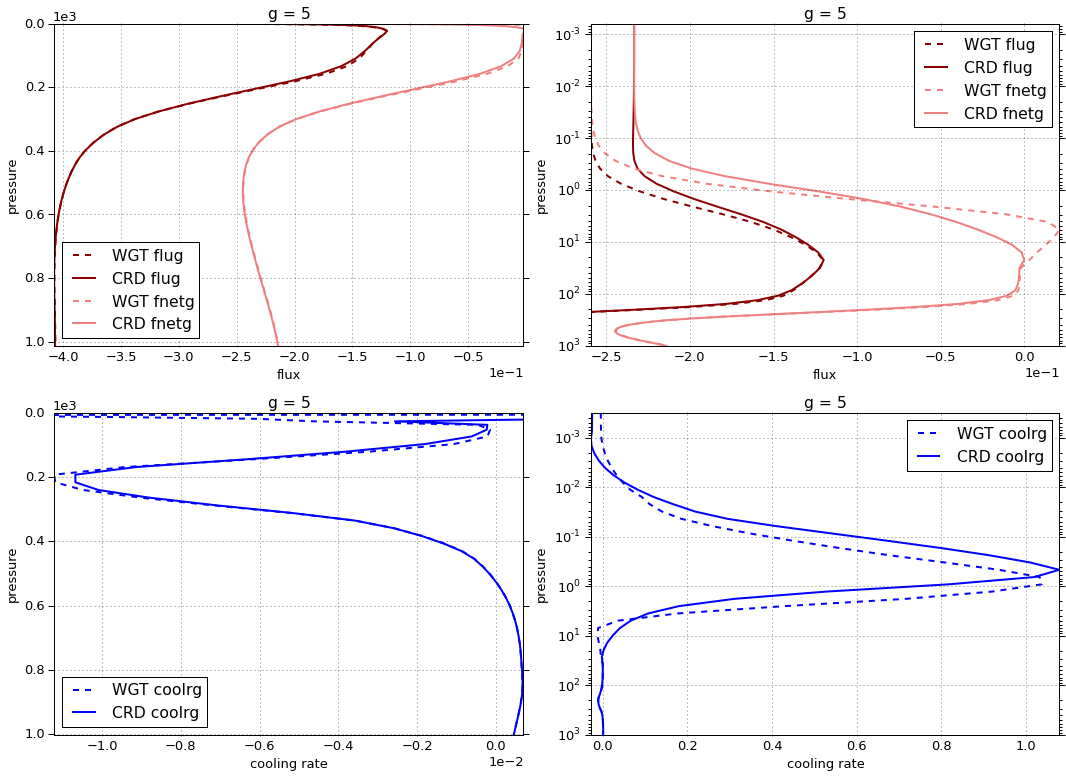

# Figure: flux, cooling rate. g-group total

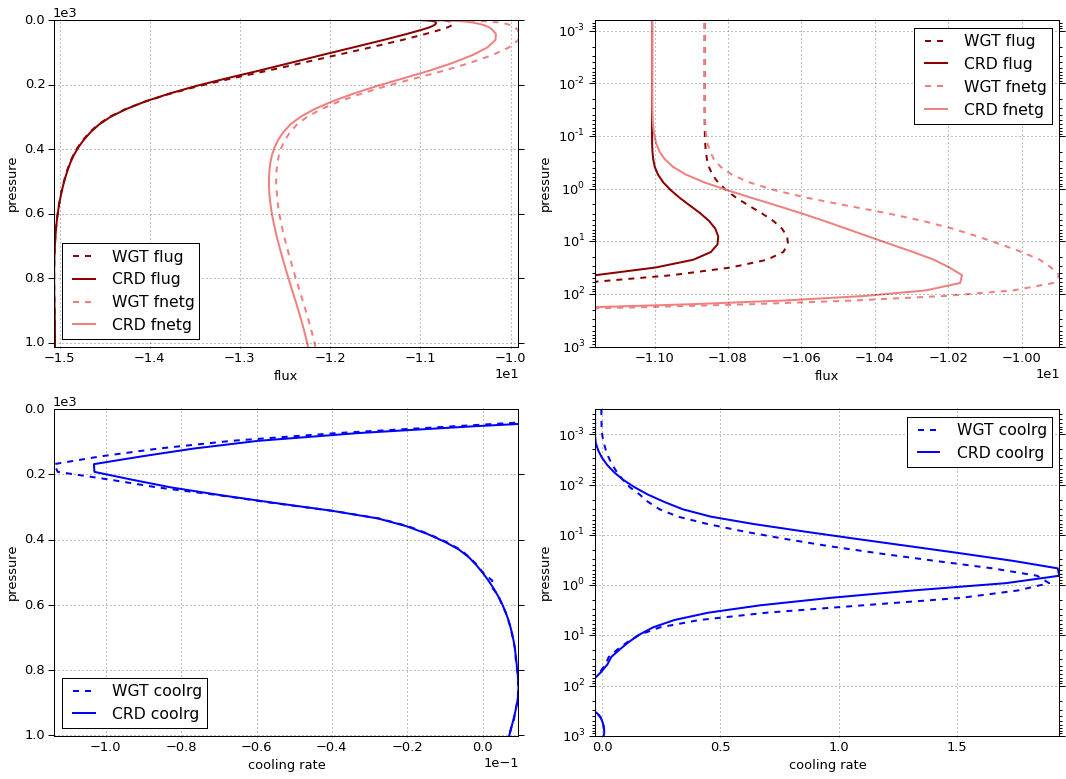

In [45]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [46]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -5.825540  0.000000 -5.825540
  1013     76    -6.058956  0.151338 -5.907618
2 0        1     -3.048600  0.000000 -3.048600
  1013     76    -4.171901  0.756576 -3.415325
3 0        1     -1.366456  0.000000 -1.366456
  1013     76    -3.015330  1.089241 -1.926089
4 0        1     -0.533074  0.000000 -0.533074
  1013     76    -1.398187  0.615481 -0.782707
5 0        1     -0.233362  0.000000 -0.233362
  1013     76    -0.407029  0.192721 -0.214308


WGT


flug      fldg     fnetg
g pressure level                              
1 0        1     -5.812954  0.000000 -5.812954
  1013     76    -6.053616  0.154571 -5.899045
2 0        1     -2.982178  0.000000 -2.982178
  1013     76    -4.176529  0.788400 -3.388129
3 0        1     -1.268737  0.000000 -1.268737
  1013     76    -3.016475  1.131361 -1.885114
4 0        1     -0.541005  0.000000 -0.541005
  1013     76    -1.397976  0.619436 -0.778540
5 0        1     -0.259155  0.000000 -0.259155
  1013     76    -0.406807  0.192816 -0.213991


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.012585  0.000000  0.012585
  1013     76     0.005340  0.003233  0.008572
2 0        1      0.066422  0.000000  0.066422
  1013     76    -0.004628  0.031824  0.027197
3 0        1      0.097719  0.000000  0.097719
  1013     76    -0.001146  0.042121  0.040975
4 0        1     -0.007931  0.000000 -0.007931
  1013     76     0.000211  0.003955  0.004167
5 0        1     -0.025793  0.000000 -0.025793
  1013     76     0.000222  0.000095  0.000317

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000075
  1001.112500 75     0.000440
2 0.000312    1     -0.000150
  1001.112500 75     0.002207
3 0.000312    1      0.000094
  1001.112500 75     0.002545
4 0.000312    1     -0.003399
  1001.112500 75     0.001331
5 0.000312    1     -0.025298
  1001.112500 75     0.000459


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000084
  1001.112500 75     0.000438
2 0.000312    1     -0.000078
  1001.112500 75     0.002240
3 0.000312    1      0.000430
  1001.112500 75     0.002532
4 0.000312    1      0.001593
  1001.112500 75     0.001339
5 0.000312    1     -0.004909
  1001.112500 75     0.000460


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -8.352186e-06
  1001.112500 75    -1.696630e-06
2 0.000312    1      7.215556e-05
  1001.112500 75     3.219640e-05
3 0.000312    1      3.361865e-04
  1001.112500 75    -1.372130e-05
4 0.000312    1      4.991084e-03
  1001.112500 75     7.097100e-06
5 0.000312    1      2.038952e-02
  1001.112500 75     2.514000e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-11.007032,0.000000,-11.007032
1013,76,-15.051403,2.805356,-12.246047



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-10.864029,0.000000,-10.864029
1013,76,-15.051403,2.886584,-12.164819



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.430030e-01,0.000000,0.143003
1013,76,5.000000e-08,0.081228,0.081228


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.028828
1001.112500,75,0.006984



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.003048
1001.112500,75,0.007008



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.025781
1001.112500,75,0.000024


In [47]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.271208,0.277484
3,0.198167,0.200412
4,0.092708,0.092880
5,0.027167,0.027028


In [48]:
writer = pd.ExcelWriter('results.xlsx')

In [49]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 1

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -5.812954  0.000000e+00 -5.812954 -5.825540  0.000000e+00   
0.000624    -5.812954  5.199832e-09 -5.812954 -5.825540  5.330008e-09   
0.000876    -5.812954  7.809143e-09 -5.812954 -5.825540  8.008066e-09   
0.001229    -5.812954  1.298306e-08 -5.812954 -5.825540  1.333258e-08   
0.001723    -5.812954  2.297134e-08 -5.812954 -5.825540  2.363848e-08   
0.002417    -5.812954  4.166181e-08 -5.812954 -5.825540  4.297243e-08   
0.003391    -5.812954  7.587031e-08 -5.812954 -5.825540  7.844630e-08   
0.004757    -5.812954  1.374227e-07 -5.812954 -5.825540  1.424283e-07   
0.006672    -5.812954  2.466957e-07 -5.812954 -5.825540  2.562766e-07   
0.009359    -5.812955  4.386649e-07 -5.812954 -5.825540  4.567253e-07   
0.013128    -5.812955  7.728825e-07 -5.812954 -5.825540  8.064407e-07   
0.018415    -5.812955  1.351083e-06 -5.812954 -5.825540  1.412660e-06   
0.025830    -5.812955  2.344754e-06 -5.812953 -5.825541  2.456440e-06   
0.036232    -5.812956  4.039033e-06 -5.812952 -5.825541  4.239311e-06   
0.050823    -5.812957  7.125398e-06 -5.812949 -5.825542  7.491762e-06   
0.071291    -5.812957  1.306843e-05 -5.812944 -5.825542  1.376081e-05   
0.100000    -5.812958  2.415724e-05 -5.812934 -5.825543  2.546695e-05   
0.140271    -5.812959  4.407734e-05 -5.812915 -5.825543  4.651085e-05   
0.196760    -5.812959  7.897655e-05 -5.812880 -5.825543  8.340080e-05   
0.275997    -5.812956  1.390089e-04 -5.812817 -5.825538  1.468858e-04   
0.387100    -5.812947  2.407283e-04 -5.812707 -5.825527  2.544833e-04   
0.543100    -5.812928  4.097142e-04 -5.812519 -5.825505  4.332270e-04   
0.761700    -5.812907  6.753804e-04 -5.812232 -5.825477  7.137888e-04   
1.068500    -5.812912  1.062070e-03 -5.811850 -5.825473  1.120333e-03   
1.498800    -5.813000  1.596425e-03 -5.811403 -5.825550  1.678468e-03   
2.102400    -5.813288  2.327966e-03 -5.810960 -5.825797  2.435959e-03   
2.949000    -5.813836  3.251037e-03 -5.810585 -5.826321  3.380995e-03   
4.136600    -5.814783  4.344239e-03 -5.810439 -5.827237  4.485460e-03   
5.802500    -5.816304  5.622960e-03 -5.810681 -5.828669  5.760749e-03   
8.139200    -5.818469  7.112886e-03 -5.811356 -5.830719  7.233682e-03   
...               ...           ...       ...       ...           ...   
323.525000  -6.040805  1.170221e-01 -5.923783 -6.045849  1.133210e-01   
347.300000  -6.043052  1.182027e-01 -5.924849 -6.048126  1.145635e-01   
371.075000  -6.044886  1.193525e-01 -5.925534 -6.049992  1.157547e-01   
394.850000  -6.046426  1.205408e-01 -5.925885 -6.051560  1.169345e-01   
418.625000  -6.047693  1.216455e-01 -5.926048 -6.052855  1.180776e-01   
442.400000  -6.048709  1.227237e-01 -5.925985 -6.053895  1.191553e-01   
466.175000  -6.049547  1.237673e-01 -5.925780 -6.054756  1.201991e-01   
489.950000  -6.050290  1.248531e-01 -5.925437 -6.055519  1.212899e-01   
513.725000  -6.050951  1.259613e-01 -5.924990 -6.056198  1.224365e-01   
537.500000  -6.051533  1.271512e-01 -5.924382 -6.056798  1.236373e-01   
561.275000  -6.052042  1.283900e-01 -5.923652 -6.057323  1.248862e-01   
585.050000  -6.052479  1.296703e-01 -5.922809 -6.057774  1.261807e-01   
608.825000  -6.052849  1.309869e-01 -5.921862 -6.058158  1.275132e-01   
632.600000  -6.053158  1.323369e-01 -5.920821 -6.058478  1.288791e-01   
656.375000  -6.053411  1.336991e-01 -5.919711 -6.058739  1.302730e-01   
680.150000  -6.053611  1.350931e-01 -5.918517 -6.058947  1.316822e-01   
703.925000  -6.053764  1.365012e-01 -5.917263 -6.059106  1.331095e-01   
727.700000  -6.053875  1.379213e-01 -5.915954 -6.059222  1.345474e-01   
751.475000  -6.053949  1.393466e-01 -5.914602 -6.059299  1.359916e-01   
775.250000  -6.053988  1.407709e-01 -5.913218 -6.059341  1.374356e-01   
799.025000  -6.053998  1.421996e-01 -5.911798 -6.059351  1.388810e-01   
822

In [50]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 2

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -2.982178  0.000000e+00 -2.982178 -3.048600  0.000000e+00   
0.000624    -2.982178  2.705708e-08 -2.982178 -3.048600  3.022948e-08   
0.000876    -2.982178  4.066431e-08 -2.982178 -3.048600  4.542740e-08   
0.001229    -2.982178  6.765847e-08 -2.982178 -3.048600  7.565609e-08   
0.001723    -2.982178  1.197703e-07 -2.982178 -3.048600  1.341659e-07   
0.002417    -2.982178  2.172328e-07 -2.982178 -3.048600  2.438684e-07   
0.003391    -2.982178  3.954287e-07 -2.982178 -3.048600  4.449163e-07   
0.004757    -2.982178  7.155563e-07 -2.982178 -3.048601  8.068942e-07   
0.006672    -2.982178  1.282675e-06 -2.982177 -3.048601  1.449462e-06   
0.009359    -2.982179  2.276344e-06 -2.982176 -3.048601  2.577433e-06   
0.013128    -2.982179  4.000827e-06 -2.982175 -3.048601  4.538284e-06   
0.018415    -2.982179  6.973185e-06 -2.982172 -3.048602  7.923060e-06   
0.025830    -2.982179  1.205991e-05 -2.982167 -3.048602  1.372287e-05   
0.036232    -2.982178  2.069277e-05 -2.982157 -3.048601  2.357592e-05   
0.050823    -2.982175  3.634971e-05 -2.982139 -3.048600  4.145562e-05   
0.071291    -2.982169  6.639725e-05 -2.982102 -3.048594  7.576620e-05   
0.100000    -2.982155  1.223043e-04 -2.982032 -3.048582  1.395685e-04   
0.140271    -2.982126  2.224576e-04 -2.981904 -3.048557  2.537481e-04   
0.196760    -2.982072  3.974422e-04 -2.981675 -3.048506  4.529136e-04   
0.275997    -2.981970  6.976446e-04 -2.981273 -3.048409  7.937626e-04   
0.387100    -2.981785  1.205018e-03 -2.980580 -3.048229  1.367771e-03   
0.543100    -2.981473  2.046312e-03 -2.979426 -3.047908  2.314574e-03   
0.761700    -2.981010  3.377256e-03 -2.977633 -3.047433  3.798523e-03   
1.068500    -2.980414  5.346946e-03 -2.975067 -3.046876  5.959593e-03   
1.498800    -2.979877  8.119096e-03 -2.971757 -3.046422  8.933415e-03   
2.102400    -2.979638  1.197717e-02 -2.967661 -3.046360  1.295383e-02   
2.949000    -2.980191  1.691569e-02 -2.963276 -3.047141  1.792915e-02   
4.136600    -2.981953  2.283521e-02 -2.959118 -3.049262  2.369479e-02   
5.802500    -2.985497  2.982062e-02 -2.955677 -3.053232  3.031921e-02   
8.139200    -2.991180  3.800330e-02 -2.953177 -3.059436  3.797854e-02   
...               ...           ...       ...       ...           ...   
323.525000  -4.079786  5.851914e-01 -3.494595 -4.072976  5.577943e-01   
347.300000  -4.097406  5.915845e-01 -3.505822 -4.090778  5.635844e-01   
371.075000  -4.111682  5.980795e-01 -3.513603 -4.105271  5.694252e-01   
394.850000  -4.123572  6.042981e-01 -3.519274 -4.117360  5.754354e-01   
418.625000  -4.133269  6.105004e-01 -3.522768 -4.127246  5.814135e-01   
442.400000  -4.140913  6.166367e-01 -3.524277 -4.135102  5.871454e-01   
466.175000  -4.147173  6.223240e-01 -3.524849 -4.141530  5.927840e-01   
489.950000  -4.152649  6.283557e-01 -3.524293 -4.147167  5.987036e-01   
513.725000  -4.157498  6.347201e-01 -3.522778 -4.152134  6.049668e-01   
537.500000  -4.161715  6.414078e-01 -3.520307 -4.156472  6.115175e-01   
561.275000  -4.165348  6.483231e-01 -3.517025 -4.160228  6.183435e-01   
585.050000  -4.168440  6.558900e-01 -3.512550 -4.163433  6.253944e-01   
608.825000  -4.171019  6.629654e-01 -3.508053 -4.166130  6.326250e-01   
632.600000  -4.173169  6.703789e-01 -3.502790 -4.168367  6.400205e-01   
656.375000  -4.174922  6.778829e-01 -3.497039 -4.170185  6.475219e-01   
680.150000  -4.176306  6.855540e-01 -3.490753 -4.171623  6.550908e-01   
703.925000  -4.177363  6.931549e-01 -3.484208 -4.172725  6.626907e-01   
727.700000  -4.178129  7.008556e-01 -3.477273 -4.173529  6.703211e-01   
751.475000  -4.178636  7.087883e-01 -3.469848 -4.174065  6.779327e-01   
775.250000  -4.178913  7.162845e-01 -3.462628 -4.174361  6.855059e-01   
799.025000  -4.178986  7.238691e-01 -3.455116 -4.174445  6.930583e-01   
822

In [51]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 3

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -1.268737  0.000000e+00 -1.268737 -1.366456  0.000000e+00   
0.000624    -1.268737  5.353649e-08 -1.268737 -1.366457  7.812110e-08   
0.000876    -1.268737  8.055653e-08 -1.268737 -1.366457  1.174624e-07   
0.001229    -1.268737  1.345100e-07 -1.268737 -1.366457  1.959819e-07   
0.001723    -1.268737  2.392798e-07 -1.268737 -1.366457  3.483520e-07   
0.002417    -1.268737  4.362363e-07 -1.268737 -1.366457  6.345706e-07   
0.003391    -1.268737  7.979369e-07 -1.268736 -1.366457  1.159735e-06   
0.004757    -1.268737  1.450146e-06 -1.268736 -1.366457  2.105752e-06   
0.006672    -1.268737  2.609063e-06 -1.268734 -1.366457  3.784835e-06   
0.009359    -1.268736  4.644449e-06 -1.268732 -1.366458  6.729972e-06   
0.013128    -1.268735  8.182920e-06 -1.268727 -1.366457  1.184246e-05   
0.018415    -1.268733  1.428883e-05 -1.268719 -1.366456  2.064942e-05   
0.025830    -1.268729  2.474414e-05 -1.268704 -1.366454  3.569996e-05   
0.036232    -1.268721  4.248949e-05 -1.268679 -1.366448  6.118562e-05   
0.050823    -1.268706  7.466802e-05 -1.268631 -1.366434  1.072739e-04   
0.071291    -1.268675  1.364261e-04 -1.268539 -1.366406  1.954313e-04   
0.100000    -1.268615  2.513723e-04 -1.268364 -1.366348  3.588037e-04   
0.140271    -1.268503  4.573950e-04 -1.268046 -1.366238  6.499367e-04   
0.196760    -1.268301  8.176302e-04 -1.267483 -1.366031  1.155000e-03   
0.275997    -1.267941  1.436356e-03 -1.266505 -1.365655  2.013062e-03   
0.387100    -1.267315  2.483778e-03 -1.264831 -1.364983  3.443561e-03   
0.543100    -1.266250  4.224945e-03 -1.262025 -1.363819  5.773599e-03   
0.761700    -1.264512  7.001396e-03 -1.257511 -1.362006  9.380357e-03   
1.068500    -1.262155  1.117259e-02 -1.250983 -1.359524  1.456246e-02   
1.498800    -1.259284  1.714697e-02 -1.242137 -1.356498  2.153699e-02   
2.102400    -1.255666  2.561530e-02 -1.230051 -1.353095  3.069325e-02   
2.949000    -1.252074  3.666258e-02 -1.215411 -1.349911  4.167216e-02   
4.136600    -1.249084  5.015540e-02 -1.198929 -1.347751  5.412687e-02   
5.802500    -1.247467  6.701472e-02 -1.180452 -1.347326  6.846271e-02   
8.139200    -1.247785  8.657028e-02 -1.161215 -1.349152  8.551357e-02   
...               ...           ...       ...       ...           ...   
323.525000  -2.829621  8.814719e-01 -1.948149 -2.824692  8.362430e-01   
347.300000  -2.865873  8.868015e-01 -1.979071 -2.861182  8.417452e-01   
371.075000  -2.894721  8.932046e-01 -2.001516 -2.890438  8.482721e-01   
394.850000  -2.918336  9.004105e-01 -2.017925 -2.914439  8.555743e-01   
418.625000  -2.937239  9.079258e-01 -2.029313 -2.933742  8.632425e-01   
442.400000  -2.951982  9.154206e-01 -2.036561 -2.948821  8.708386e-01   
466.175000  -2.963805  9.228413e-01 -2.040964 -2.960941  8.784572e-01   
489.950000  -2.973959  9.308482e-01 -2.043111 -2.971393  8.865758e-01   
513.725000  -2.982814  9.392578e-01 -2.043556 -2.980454  8.951586e-01   
537.500000  -2.990364  9.505286e-01 -2.039835 -2.988248  9.041463e-01   
561.275000  -2.996811  9.587149e-01 -2.038096 -2.994901  9.134972e-01   
585.050000  -3.002220  9.679824e-01 -2.034238 -3.000501  9.231228e-01   
608.825000  -3.006732  9.773828e-01 -2.029349 -3.005154  9.329711e-01   
632.600000  -3.010424  9.870647e-01 -2.023359 -3.008970  9.429444e-01   
656.375000  -3.013371  9.967679e-01 -2.016603 -3.012039  9.529969e-01   
680.150000  -3.015695  1.006658e+00 -2.009037 -3.014445  9.630304e-01   
703.925000  -3.017453  1.016431e+00 -2.001022 -3.016273  9.730549e-01   
727.700000  -3.018713  1.026185e+00 -1.992529 -3.017599  9.830172e-01   
751.475000  -3.019561  1.035898e+00 -1.983662 -3.018482  9.928731e-01   
775.250000  -3.020019  1.045429e+00 -1.974590 -3.018974  1.002599e+00   
799.025000  -3.020155  1.054958e+00 -1.965197 -3.019126  1.012208e+00   
822

In [52]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 4

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.541005  0.000000e+00 -0.541005 -0.533074  0.000000e+00   
0.000624    -0.541005  2.608748e-07 -0.541005 -0.533075  4.386415e-07   
0.000876    -0.541005  3.910276e-07 -0.541005 -0.533075  6.569844e-07   
0.001229    -0.541005  6.447912e-07 -0.541004 -0.533076  1.082568e-06   
0.001723    -0.541005  1.125821e-06 -0.541004 -0.533077  1.888978e-06   
0.002417    -0.541005  2.008605e-06 -0.541003 -0.533078  3.368163e-06   
0.003391    -0.541005  3.591340e-06 -0.541002 -0.533080  6.018535e-06   
0.004757    -0.541005  6.377801e-06 -0.540999 -0.533083  1.068100e-05   
0.006672    -0.541005  1.121240e-05 -0.540994 -0.533087  1.876265e-05   
0.009359    -0.541004  1.950395e-05 -0.540984 -0.533092  3.260602e-05   
0.013128    -0.541000  3.358146e-05 -0.540967 -0.533098  5.607260e-05   
0.018415    -0.540994  5.730737e-05 -0.540936 -0.533105  9.554234e-05   
0.025830    -0.540980  9.699124e-05 -0.540883 -0.533110  1.613835e-04   
0.036232    -0.540955  1.627947e-04 -0.540792 -0.533111  2.701746e-04   
0.050823    -0.540906  2.796880e-04 -0.540626 -0.533100  4.624758e-04   
0.071291    -0.540806  5.004583e-04 -0.540306 -0.533060  8.229433e-04   
0.100000    -0.540613  9.055798e-04 -0.539707 -0.532963  1.476443e-03   
0.140271    -0.540256  1.621240e-03 -0.538635 -0.532746  2.610697e-03   
0.196760    -0.539626  2.853800e-03 -0.536773 -0.532303  4.514833e-03   
0.275997    -0.538461  4.936955e-03 -0.533524 -0.531433  7.625219e-03   
0.387100    -0.536502  8.401694e-03 -0.528100 -0.529778  1.256583e-02   
0.543100    -0.533135  1.405312e-02 -0.519082 -0.526726  2.014717e-02   
0.761700    -0.527895  2.302032e-02 -0.504875 -0.521815  3.111014e-02   
1.068500    -0.520118  3.662151e-02 -0.483496 -0.514805  4.557515e-02   
1.498800    -0.509732  5.616385e-02 -0.453568 -0.505882  6.257515e-02   
2.102400    -0.496466  8.338167e-02 -0.413084 -0.494953  8.110932e-02   
2.949000    -0.481543  1.166758e-01 -0.364868 -0.482854  9.928753e-02   
4.136600    -0.466727  1.540424e-01 -0.312684 -0.470922  1.169552e-01   
5.802500    -0.453427  1.930397e-01 -0.260387 -0.460154  1.361609e-01   
8.139200    -0.442263  2.313445e-01 -0.210919 -0.450939  1.590330e-01   
...               ...           ...       ...       ...           ...   
323.525000  -1.266995  4.796331e-01 -0.787362 -1.264953  4.736395e-01   
347.300000  -1.293748  4.821150e-01 -0.811633 -1.291790  4.762163e-01   
371.075000  -1.314768  4.855186e-01 -0.829249 -1.312989  4.797429e-01   
394.850000  -1.331639  4.896206e-01 -0.842019 -1.330122  4.839489e-01   
418.625000  -1.344978  4.940116e-01 -0.850967 -1.343702  4.884627e-01   
442.400000  -1.355223  4.984261e-01 -0.856797 -1.354160  4.929785e-01   
466.175000  -1.363296  5.028323e-01 -0.860464 -1.362452  4.975157e-01   
489.950000  -1.370199  5.075520e-01 -0.862647 -1.369507  5.023332e-01   
513.725000  -1.376077  5.125743e-01 -0.863503 -1.375549  5.074235e-01   
537.500000  -1.381065  5.177700e-01 -0.863295 -1.380689  5.127357e-01   
561.275000  -1.385282  5.231625e-01 -0.862120 -1.385031  5.182274e-01   
585.050000  -1.388803  5.286742e-01 -0.860129 -1.388652  5.238400e-01   
608.825000  -1.391680  5.342272e-01 -0.857453 -1.391634  5.295305e-01   
632.600000  -1.394033  5.398941e-01 -0.854139 -1.394060  5.352656e-01   
656.375000  -1.395898  5.455314e-01 -0.850366 -1.395997  5.410108e-01   
680.150000  -1.397360  5.511503e-01 -0.846210 -1.397506  5.467170e-01   
703.925000  -1.398453  5.567248e-01 -0.841728 -1.398646  5.523683e-01   
727.700000  -1.399244  5.622328e-01 -0.837011 -1.399469  5.579565e-01   
751.475000  -1.399766  5.677017e-01 -0.832065 -1.400016  5.634542e-01   
775.250000  -1.400054  5.730300e-01 -0.827025 -1.400322  5.688418e-01   
799.025000  -1.400143  5.782546e-01 -0.821888 -1.400419  5.741431e-01   
822

In [53]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 5

wgt                               crd                    
                 flug          fldg     fnetg      flug      fldg     fnetg
pressure                                                                   
0.000000    -0.259155  0.000000e+00 -0.259155 -0.233362  0.000000 -0.233362
0.000624    -0.259156  7.746434e-07 -0.259155 -0.233365  0.000002 -0.233363
0.000876    -0.259157  1.164788e-06 -0.259155 -0.233367  0.000003 -0.233364
0.001229    -0.259158  1.914840e-06 -0.259156 -0.233370  0.000004 -0.233365
0.001723    -0.259159  3.316500e-06 -0.259156 -0.233374  0.000007 -0.233367
0.002417    -0.259161  5.852621e-06 -0.259155 -0.233381  0.000013 -0.233369
0.003391    -0.259164  1.033617e-05 -0.259154 -0.233392  0.000022 -0.233370
0.004757    -0.259169  1.812064e-05 -0.259151 -0.233408  0.000039 -0.233369
0.006672    -0.259175  3.144262e-05 -0.259143 -0.233431  0.000068 -0.233363
0.009359    -0.259182  5.398268e-05 -0.259128 -0.233463  0.000116 -0.233347
0.013128    -0.259191  9.174292e-05 -0.259099 -0.233506  0.000196 -0.233310
0.018415    -0.259196  1.545485e-04 -0.259042 -0.233563  0.000328 -0.233235
0.025830    -0.259203  2.582348e-04 -0.258944 -0.233632  0.000544 -0.233088
0.036232    -0.259200  4.279647e-04 -0.258772 -0.233713  0.000894 -0.232819
0.050823    -0.259177  7.260909e-04 -0.258451 -0.233808  0.001498 -0.232310
0.071291    -0.259108  1.284147e-03 -0.257824 -0.233919  0.002602 -0.231317
0.100000    -0.258944  2.299005e-03 -0.256645 -0.234025  0.004545 -0.229480
0.140271    -0.258578  4.070966e-03 -0.254507 -0.234062  0.007783 -0.226279
0.196760    -0.257847  7.073310e-03 -0.250774 -0.233886  0.012945 -0.220940
0.275997    -0.256432  1.200694e-02 -0.244425 -0.233195  0.020825 -0.212370
0.387100    -0.253787  2.000475e-02 -0.233783 -0.231361  0.032291 -0.199070
0.543100    -0.249043  3.255976e-02 -0.216483 -0.227136  0.048009 -0.179127
0.761700    -0.241187  5.144805e-02 -0.189739 -0.219936  0.067227 -0.152709
1.068500    -0.229931  7.791267e-02 -0.152019 -0.209694  0.086690 -0.123004
1.498800    -0.215600  1.104476e-01 -0.105153 -0.197457  0.101341 -0.096116
2.102400    -0.198458  1.444193e-01 -0.054038 -0.183660  0.109707 -0.073953
2.949000    -0.180291  1.692792e-01 -0.011011 -0.169401  0.113463 -0.055938
4.136600    -0.163590  1.775114e-01  0.013921 -0.156272  0.115415 -0.040857
5.802500    -0.149999  1.709059e-01  0.020907 -0.145426  0.117514 -0.027912
8.139200    -0.139509  1.573402e-01  0.017832 -0.136729  0.120066 -0.016663
...               ...           ...       ...       ...       ...       ...
323.525000  -0.353323  1.404817e-01 -0.212841 -0.352961  0.139950 -0.213012
347.300000  -0.364439  1.415265e-01 -0.222912 -0.364086  0.141014 -0.223072
371.075000  -0.373128  1.429545e-01 -0.230173 -0.372831  0.142468 -0.230363
394.850000  -0.380094  1.446466e-01 -0.235447 -0.379857  0.144184 -0.235673
418.625000  -0.385569  1.464382e-01 -0.239131 -0.385391  0.146004 -0.239387
442.400000  -0.389739  1.482194e-01 -0.241520 -0.389624  0.147804 -0.241820
466.175000  -0.393029  1.499874e-01 -0.243041 -0.392956  0.149594 -0.243362
489.950000  -0.395795  1.518488e-01 -0.243947 -0.395773  0.151478 -0.244295
513.725000  -0.398148  1.537958e-01 -0.244352 -0.398169  0.153451 -0.244719
537.500000  -0.400135  1.558158e-01 -0.244319 -0.400196  0.155491 -0.244705
561.275000  -0.401801  1.578803e-01 -0.243921 -0.401899  0.157584 -0.244315
585.050000  -0.403185  1.599825e-01 -0.243202 -0.403311  0.159706 -0.243605
608.825000  -0.404318  1.621060e-01 -0.242212 -0.404469  0.161844 -0.242626
632.600000  -0.405237  1.642271e-01 -0.241010 -0.405408  0.163984 -0.241423
656.375000  -0.405963  1.663342e-01 -0.239629 -0.406154  0.166113 -0.240041
680.150000  -0.406527  1.684238e-01 -0.238103 -0.406733  0.168217 -0.238517
703.925000  -0.406952  1.704727e-01 -0.236479 -0.407170  0.170288 -0.236882
727.700000  -0.407258  1.725007e-01 -0.234758 -0.407485  0.172325 -0.235160
751.475000  -0.407461  1.744763e-01 -0.232985 -0.407694  0.174320 

In [54]:
g = 1

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 1

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000084,-0.000075,8.352186e-06
0.000750,-0.000090,-0.000080,9.914088e-06
0.001052,-0.000102,-0.000089,1.312551e-05
0.001476,-0.000102,-0.000085,1.689115e-05
0.002070,-0.000089,-0.000067,2.129450e-05
0.002904,-0.000059,-0.000033,2.653551e-05
0.004074,-0.000011,0.000022,3.284531e-05
0.005714,0.000062,0.000092,2.983901e-05


In [55]:
g = 2

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 2

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000078,-0.000150,-0.000072
0.000750,-0.000043,-0.000123,-0.000080
0.001052,0.000027,-0.000070,-0.000096
0.001476,0.000178,0.000072,-0.000105
0.002070,0.000408,0.000271,-0.000137
0.002904,0.000734,0.000579,-0.000155
0.004074,0.001176,0.001069,-0.000107
0.005714,0.001757,0.001750,-0.000007


In [56]:
g = 3

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 3

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,0.000430,0.000094,-0.000336
0.000750,0.000606,0.000250,-0.000356
0.001052,0.000975,0.000573,-0.000401
0.001476,0.001529,0.001438,-0.000091
0.002070,0.002269,0.001965,-0.000304
0.002904,0.003233,0.003276,0.000043
0.004074,0.004461,0.004555,0.000094
0.005714,0.006004,0.006617,0.000613


In [57]:
g = 4

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 4

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,0.001593,-0.003399,-4.991084e-03
0.000750,0.002332,-0.003143,-5.475331e-03
0.001052,0.003819,-0.001281,-5.099801e-03
0.001476,0.006070,-0.001236,-7.306768e-03
0.002070,0.009028,0.001849,-7.179299e-03
0.002904,0.012799,0.005409,-7.389573e-03
0.004074,0.017502,0.011258,-6.243355e-03
0.005714,0.023269,0.018196,-5.072761e-03


In [58]:
g = 5

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 5

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.004909,-0.025298,-2.038952e-02
0.000750,-0.004420,-0.025881,-2.146139e-02
0.001052,-0.003343,-0.028203,-2.485956e-02
0.001476,-0.000225,-0.026732,-2.650649e-02
0.002070,0.004678,-0.020099,-2.477693e-02
0.002904,0.011584,-0.009628,-2.121255e-02
0.004074,0.020741,0.005210,-1.553137e-02
0.005714,0.032416,0.025128,-7.287838e-03


In [59]:
writer.save()

In [60]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
!ls

results.ipynb  results.xlsx
